# [AI 이노베이션 스퀘어] 12기 고급 시각반
- github: https://github.com/hysKim1/AI_Vision
    - [파이썬 공식문서]https://docs.python.org/ko/3/
    - [Numpy 공식문서]https://numpy.org/devdocs/
    - [ML]https://developers.google.com/machine-learning/crash-course/ml-intro?hl=ko
    - [DL]https://www.tensorflow.org/?hl=ko
      
---
* [Autoencoder](#Autoencoder)
    * [Simple Autoencoder](#Simple-Autoencoder)
    * [Sparse Autoencoder:regularizer](#regularizer)
    * [Deep Autoencoder](#Deep-Autoencoder)
    * [Convolutional Autoencoder](#Convolutional-Autoencoder)
    * [Denoising](#Denoising)
--- 


Model:
  - 실생활에 문제를 풀기 위해서 **특별한 가정**하에 단순화 하여 **특별한 형태**로 만들어서 문제를 풂
  - 표현형태: 그림/글/기호,수식
  
Computational Model:기계가 계산 가능한 모델
  - Intelligence > Artificial Intelligence (AI) 
      - 인공지능: **인간의 지능을 대신한** compuation model 
  - programming 형태 표현
    - Functional Programming으로 이론과 프로그래밍 사이의 간극을 줄임
  - 기계는 계산은 가능하지만 reasoning 불가

1. Logic/ Rule-based systems: 사람이 가이드 라인을 주면 가이드 라인 안에서 기계가 최선의 선택함
  - 사람이 특징을 찾아서 수학 프로그래밍
  
2.  ML: symbol 중심으로 이성적 논리구조로 문제를 풀기
  - 데이터 기반
  - Classic ML: 어떤 방법으로 특정 문제를 간략하게 특징을 모델링하여 기계가 데이터를 통해서 특징을 찾게함 
  - 숨어있는 특징 찾으나 사람이 이해를 못함


## Representation Learning
- representation learning: 숨겨진 구조/특성을 찾는 학습
> Ian Goodfellow Deep Learning :AI>ML>**RL**>DL
  - GAN, 수많은 딥러닝 테크닉 만듦.
  - non parametric 특징을 갖음
  - cost를 줄여서 실제적으로 사용할 수 있도록 만듦.
    - 딥러닝은 데이터를 통해서 특징을 찾아서 특징 기반으로 목적 달성
        > -CNN : 이미지의 대표할수 있는 특징을 단순화해서 찾음

## AutoEncoder
- Autoencoder : encoder & decoder
-  Encoder, Decoder 로 이루어져 입력을** 압축(compression)하고 다시 특징을 재구성(reconstruction)**하는 비지도 학습의 일종으로 representation learning의 핵심.
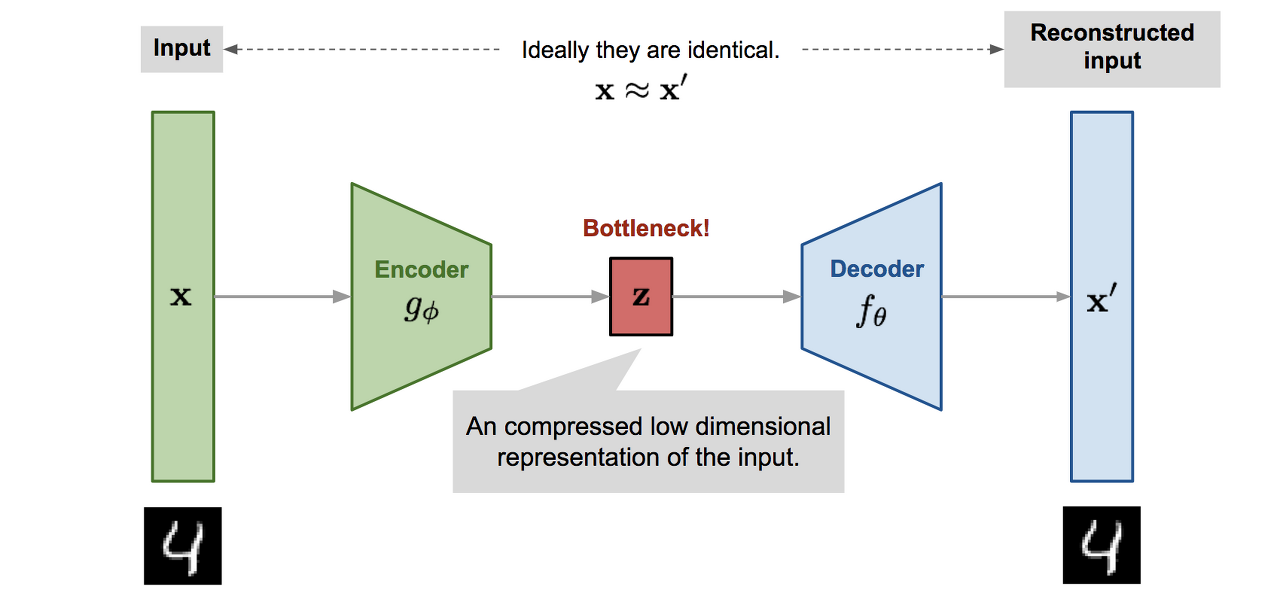

- object segmentation 의 중요한 기법
- 데이터를 압축하는 알고리즘

- data sepecific :데이터마다 모델이 상이
 - 일반적 압축 알고리즘과 상이함

2) lossy - 손실이 있는 복원


- 데이터를 통해서 데이터 고유한 특징 찾아서 **단순화**(특성을 압축 compresssion)하고 다시 **특징을 복원**(reconstruction/decompression)
  - 예. 2 특징을 알면 단순화 가능하며 복원도 가능

  - semi-supervised/self-supervised 스스로 학습
- Nonlinear Dimensionality reduction
- generative larening 
  - 예. PCA 복잡한 공간을 차원축소하면서 고유의 특징을 잃지않고 저차원에 projection해서 표현
  - 예. CNN 풀링으로 차원축소해도 그대로 유지됨
  
참고 : 인공지능.pdf

### 3요소
- encoding func
- decoding func
- loss func: 원본에 대해 압축된 표현

--- 

- keras blog, Building Autoencoders in Keras 참고: 
https://blog.keras.io/building-autoencoders-in-keras.html
  > - badly outdated

- 논문 참고: Recent advnaces in Autoencoder-based Representation Learning(2018)
  > - NIPS 2016, Andrew Ng: transfer learinig 미래기술
  > - Yann LeCun : Unsupervised Learning 미래기술
        - 비지도학습: 특정 지식이 생기면 바탕으로 스스로 특징 학습
    - unlabelled data 훨씬 더 많음 
    - Autoencode 활용 분야: Disentanglement, Hierachial representation, semi-supervised, Clustering

- 실용성: 강 인공지능의 기본 모델
  - data denoising
  - dimensionality for data visualization
  - VAE 생성 모델에서 중요(GAN 대항마)
  
> - so What's the big deal with autoencoders?
  - introductory ml 
  -  vision self-supervised learning- autoencoder

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(X_train,_),(X_test,_)=tf.keras.datasets.mnist.load_data() #비지도 학습

In [ ]:
X_train =X_train.reshape(60000,28*28) 
X_train=X_train/255

X_test =X_test.reshape(-1,28*28)
X_test=X_test/25

### Simple Autoencoder
- 784개 입력 데이터를 32개로 줄어들었다가 다시 784로 복원
- 잘 되었는지 확인하기 위해서 이진분류를 위해서 sigmoid

In [ ]:
inputs=tf.keras.Input((784,)) 
encoder=tf.keras.layers.Dense(32, activation='relu')(inputs) #784 개를 32개로 표현
decoder=tf.keras.layers.Dense(784, activation='sigmoid')(encoder) # 복원

autoencoder=tf.keras.models.Model(inputs, decoder)

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') #이진분류

비지도 학습: 라벨 없이 train 데이터로 학습

In [ ]:
autoencoder.fit(X_train,X_train, epochs=50 )

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0933
Epoch 19/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0932
Epoch 20/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0932
Epoch 21/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0932
Epoch 22/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0931
Epoch 23/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0931
Epoch 24/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0931
Epoch 25/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0930
Epoch 26/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0930
Epoch 27/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0930
Epoch 28/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0930
Epoch 29/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0930
Epoc

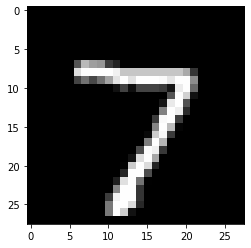

In [ ]:
plt.imshow(X_test[0].reshape(28,28), cmap='gray')  #7

In [ ]:
encoder #값 집어넣은 결과가 나

<tf.Tensor 'dense/Relu:0' shape=(None, 32) dtype=float32>

In [ ]:
autoencoder.layers

In [ ]:
encoder_layer=autoencoder.layers[1]

In [ ]:
encoder_layer(X_test[0][np.newaxis])#이미지 압축


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[ 2.6179209,  2.1377892,  2.490064 ,  2.1973882,  2.224336 ,
         4.3398767,  6.9200664,  3.553017 ,  5.179223 ,  5.0457563,
         3.2428064,  4.848373 ,  2.6884372,  1.5765097,  0.       ,
         9.188747 ,  6.350508 ,  4.495895 ,  3.0211644,  1.7274741,
        10.259258 ,  3.8496256,  6.779485 ,  1.8269283,  4.6687164,
         2.3931072,  3.1057854,  2.012877 ,  7.0773144,  1.0926512,
         9.171673 ,  3.356864 ]], dtype=float32)>

In [ ]:
autoencoder(X_test[0][np.newaxis])  #압축된 이미 복원

<tf.Tensor: shape=(1, 784), dtype=float32, numpy=
array([[2.76805051e-10, 1.37503106e-10, 3.45733553e-10, 4.15393331e-10,
        2.09277665e-10, 2.54541666e-10, 2.97877278e-10, 1.45800941e-10,
        1.25821853e-10, 4.75729733e-10, 9.94757818e-11, 2.86162705e-10,
        6.99191371e-10, 1.13322962e-09, 2.04883896e-12, 5.31125734e-11,
        3.33358036e-10, 5.04681540e-11, 1.12346500e-10, 2.64087918e-10,
        1.71906614e-10, 1.85801985e-10, 2.83735480e-10, 3.12902981e-10,
        3.31505962e-10, 8.50669882e-11, 4.07245515e-10, 1.68602521e-10,
        2.35631792e-10, 1.96553537e-10, 1.09004451e-10, 6.87689961e-10,
        3.37009066e-14, 1.00129120e-13, 2.70393166e-08, 1.07300835e-09,
        3.41410372e-11, 7.93828284e-12, 8.39399383e-10, 1.49606656e-08,
        3.50491192e-08, 1.40046396e-07, 2.11501758e-12, 9.33784978e-14,
        4.35386189e-12, 1.84675174e-11, 4.06383781e-12, 2.02079456e-12,
        9.76603243e-10, 5.59398083e-11, 7.62942973e-11, 1.05395781e-09,
        1.5666

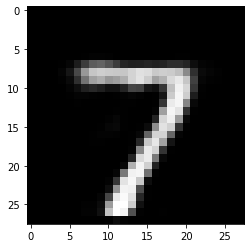

In [ ]:
decoder_image=autoencoder(X_test[0][np.newaxis]).numpy()
plt.imshow(decoder_image.reshape(28,28),cmap='gray') # 7로 보임

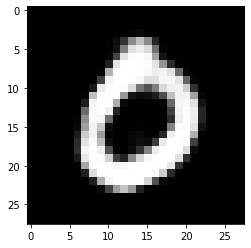

In [ ]:
decoder_image=autoencoder(X_test[3][np.newaxis]).numpy()
plt.imshow(decoder_image.reshape(28,28),cmap='gray') # 0으로 보임

모델 개선
 - 텐서플로우에 모델을 레이어처럼 사용 가능
모델을 만들면 fit, predict 사용 가능
모델로 감싸면 별도로 학습, 예측 가능

In [ ]:
dir(decoder) # 

['OVERLOADABLE_OPERATORS',
 '_USE_EQUALITY',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__bool__',
 '__class__',
 '__copy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmatmul__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '__xor__',
 '_as_node_def_input',
 '_as_tf_output',
 '_c_api_shape',
 '_consumers',
 '_create_with_tf_output',
 '_d

In [ ]:
decoder_model=tf.keras.models.Model(decoder_inputs ,decoder) 
#이미 학습됨

ValueError: ignored

코딩 테크닉
- 모델안에 모델 넣으면 레이어처럼 사용
- 각 모델을 별도 학습,예측 가능
- 모델로 만들면 공유한 상태로 별도의 모델 사용 가능 
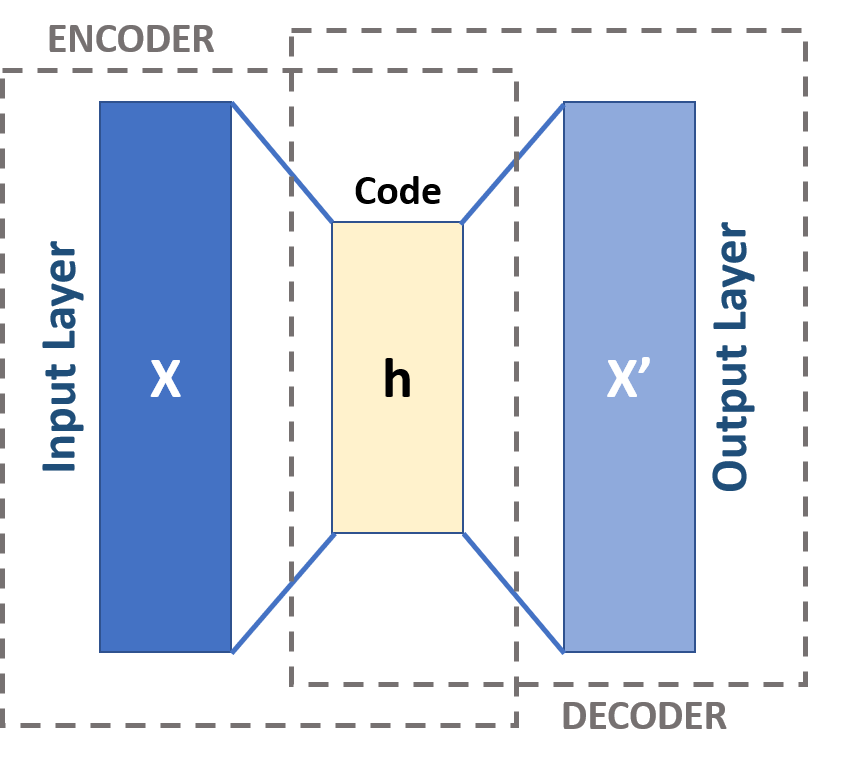
  - Input 784 - encoder 32- decoder 784
- encoder model: 784개 입력 받을것을 32개로 변환
- decoder model: 32개 입력 받을것을 784개로 변환
  - 이전의 레이어 같이 들어오기 때문에 decoder는 input(784)받은 encoder(32)를 포함하기 때문에 layer 사용

In [ ]:
#이미 학습됨
inputs=tf.keras.Input((784,))
encoder=tf.keras.layers.Dense(32, activation='relu')(inputs)      # 784->32
decoder=tf.keras.layers.Dense(784, activation='sigmoid')(encoder) # 784->32-> 784

autoencoder=tf.keras.models.Model(inputs, decoder)

In [ ]:
encoder #(None, 32)

<tf.Tensor 'dense_2/Relu:0' shape=(None, 32) dtype=float32>

In [ ]:
decoder #(None, 784) encoder를 거쳐서 나온 Sigmoid된 결과값으로 나옴    

<tf.Tensor 'dense_3/Sigmoid:0' shape=(None, 784) dtype=float32>

In [ ]:
autoencoder.layers[-1] #layer 자체로 나옴;  tf.keras.layers.Dense(784, activation='sigmoid')

In [ ]:
#encoder #(None, 32),모델로 만들면 별도의 모델로 사용 가능 
encoder_model= tf.keras.models.Model(inputs,encoder )

decoder_layer= autoencoder.layers[-1]#영향 안받기 위해 레이어만 가져옴 decoder_inputs= tf.keras.Input((32))
decoder inputs= tf.keras.Input((32,))
decoder_model= tf.keras.models.Model(decoder_inputs ,decoder_layer(decoder_inputs) )

### regularizer
- 제약 사항을 주어 조건 규제하여 단순화 시켜서 개선시켜서 학습이 잘 됨

- regularizer L1,L2 
  - Dense, Convolution layer의 3가지 regularizer 
   - kernel, bias, activity_regularizer
     - kernel, bias, activation된 값 규제
     - 변화 정도에 텀을 주어 너무 크게 변화지 않도록 함

참고: https://keras.io/api/layers/convolution_layers/convolution2d/


In [ ]:
(X_train,_),(X_test,_)=tf.keras.datasets.mnist.load_data() #비지도 학습
X_train =X_train.reshape(60000,28*28) 
X_train=X_train/255

X_test =X_test.reshape(-1,28*28)
X_test=X_test/255

inputs=tf.keras.Input((784,))
encoder=tf.keras.layers.Dense(32, activation='relu', 
                              activity_regularizer=tf.keras.regularizers.l1() )(inputs) 

decoder=tf.keras.layers.Dense(784, activation='sigmoid')(encoder)  
autoencoder=tf.keras.models.Model(inputs, decoder)

decoder_inputs= tf.keras.Input((32,))
encoder_model= tf.keras.models.Model(inputs,encoder )     
decoder_layer= autoencoder.layers[-1]#영향 안받기 위해 레이어만 가져옴 decoder_inputs= tf.keras.Input((32))
decoder_model= tf.keras.models.Model(decoder_inputs ,decoder_layer(decoder_inputs) ) #학습


autoencoder compile하면 모든 모델이 공유하게되어서 fit, predict 사용가능

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(X_train, X_train,
                epochs=50) # loss가 잘 안떨어 

Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4855
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3233
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2835
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2706
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2659
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2641
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2633
Epoch 8/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2630
Epoch 9/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2629
Epoch 10/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2628
Epoch 11/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2628
Epoch 12/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2628
E

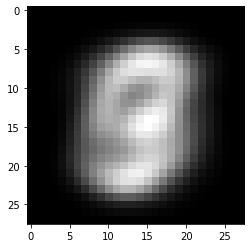

In [ ]:
decoder_image=autoencoder(X_test[0][np.newaxis]).numpy()
plt.imshow(decoder_image.reshape(28,28),cmap='gray') 

In [ ]:
e_i=encoder_model.predict(X_test)
d_i=decoder_model.predict(e_i)

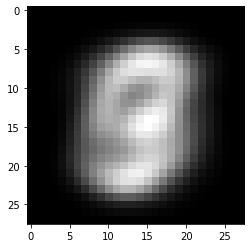

In [ ]:
plt.imshow(d_i[0].reshape(28,28), cmap='gray') #학습이 잘 안됨

### Deep Autoencoder
- encoder, decoder 레이어 한개로 784 -> 32차원으로 바꾸려 하니 잘 안됨
- 레이어를 깊게 쌓으면 비선형성 향상되서 성능 향상
  - 과적합여부를 알 수 없음

In [ ]:
input_img=tf.keras.Input((784,))
encoded = tf.keras.layers.Dense(256, activation='relu')(input_img)
encoded = tf.keras.layers.Dense(128, activation='relu')(input_img)
encoded = tf.keras.layers.Dense(64, activation='relu')(input_img)
encoded = tf.keras.layers.Dense(32, activation='relu')(input_img)
#역순
decoded = tf.keras.layers.Dense(64, activation='relu')(encoded)
decoded = tf.keras.layers.Dense(128, activation='relu')(decoded)
decoded = tf.keras.layers.Dense(256, activation='relu')(decoded)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(decoded) # 이진 분류 : 맞다 틀리다

In [ ]:
autoencoder = tf.keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(X_train,X_train, epochs=100, batch_size=256)

Epoch 1/100
235/235 [==============================] - 1s 4ms/step - loss: 0.2324
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1386
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1204
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1113
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1052
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1016
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0987
Epoch 8/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0965
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0947
Epoch 10/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0932
Epoch 11/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0919
Epoch 12/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0909
Epoch 13/100


- 특징을 잘 압축해서 복원함
- 딥러닝으로 representation learning도 발전

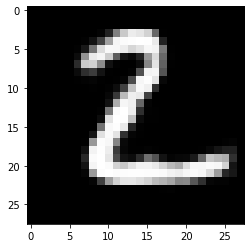

In [ ]:
x_ = autoencoder.predict(X_test)[1]
plt.imshow(x_.reshape(28,28))

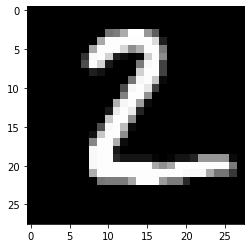

In [ ]:
plt.imshow(X_test[1].reshape(28,28)) #원본

### Deep Convolutional Autoencoder
 - 입력: 3차원 이미지 데이터

In [12]:
(X_train,_),(X_test,_)=tf.keras.datasets.mnist.load_data()
X_train=X_train.reshape(-1,28,28,1)
X_train=X_train/255
X_test=X_test.reshape(-1,28,28,1)
X_test=X_test/255

### 복원
- up sampling: 크기 늘리는것
  - 원본을 유지
  - `UpSampling2D` 학습을 통해서 늘림
- CNN: 크기는 줄어들지만 원래 원본 이미지의 특성을 간직하고 flatten해서 예측했더니 FCNN보다 성능이 좋음
  - pooling기법 (down)sampling이라함
- dl은 representation learning 일종


In [13]:
#padding 없이 모델 구성
input_img=tf.keras.Input((28,28,1))

x = tf.keras.layers.Conv2D(16, 3, activation='relu')(input_img)
x = tf.keras.layers.MaxPool2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8,3, activation='relu')(x
x = tf.keras.layers.MaxPool2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, 3, activation='relu')(x) 
encoded = tf.keras.layers.MaxPool2D((2, 2))(x)

# 크기복원:convolution으로 축소되어서 upsampling
x = tf.keras.layers.Conv2D(8, 3, activation='relu')(encoded) 
x = tf.keras.layers.UpSampling2D((2,2))(x) 
x = tf.keras.layers.Conv2D(8, 3, activation='relu')(x) 
x = tf.keras.layers.UpSampling2D((2,2))(x)
x = tf.keras.layers.Conv2D(16, 3, activation='relu')(x) 
x = tf.keras.layers.UpSampling2D((2,2))(x)

#최종 레이어: 이미지 하나씩 입력되었어서  1
decoded = tf.keras.layers.Conv2D(1, 3, activation='sigmoid')(x) 

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

SyntaxError: ignored

In [14]:
b=np.arange(24).reshape(1,2,4,3)  # 2,3,4 이미지 1개
b

array([[[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17],
         [18, 19, 20],
         [21, 22, 23]]]])

- 이미지 interpolation: nearest, bilinear
4d tensor 

In [15]:
a= tf.keras.layers.UpSampling2D((2,1)) #2차원 이미지 #height 2배
a(b) #레이어는 함수형 패러다임  

<tf.Tensor: shape=(1, 4, 4, 3), dtype=int64, numpy=
array([[[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11]],

        [[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17],
         [18, 19, 20],
         [21, 22, 23]],

        [[12, 13, 14],
         [15, 16, 17],
         [18, 19, 20],
         [21, 22, 23]]]])>

In [16]:
a= tf.keras.layers.UpSampling2D((1,3)) #2차원 이미지  width 3배  
a(b) #레이어는 함수형 패러다임 

<tf.Tensor: shape=(1, 2, 12, 3), dtype=int64, numpy=
array([[[[ 0,  1,  2],
         [ 0,  1,  2],
         [ 0,  1,  2],
         [ 3,  4,  5],
         [ 3,  4,  5],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 6,  7,  8],
         [ 6,  7,  8],
         [ 9, 10, 11],
         [ 9, 10, 11],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [12, 13, 14],
         [12, 13, 14],
         [15, 16, 17],
         [15, 16, 17],
         [15, 16, 17],
         [18, 19, 20],
         [18, 19, 20],
         [18, 19, 20],
         [21, 22, 23],
         [21, 22, 23],
         [21, 22, 23]]]])>

In [17]:
import keras
from keras import layers
#입력 크기 맞추기 위해서 padding ='same'

input_img = keras.Input(shape=(28, 28, 1))
#encoder   #특성따라서 학습
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional
#decoder  특성 바탕으로 새롭게 생성, 가짜데이터 생성
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)  
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)


In [18]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [21]:
autoencoder.fit(X_train, X_train,
                epochs=100,
                batch_size=256)

Epoch 1/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0901
Epoch 2/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0901
Epoch 3/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0900
Epoch 4/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0899
Epoch 5/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0899
Epoch 6/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0899
Epoch 7/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0898
Epoch 8/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0897
Epoch 9/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0897
Epoch 10/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0897
Epoch 11/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0897
Epoch 12/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0895
Epoch 13/100


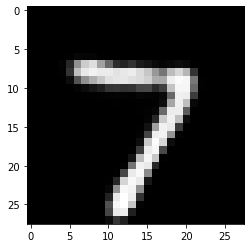

In [20]:
decoder_image=autoencoder(X_test[0][np.newaxis]).numpy()
plt.imshow(decoder_image.reshape(28,28),cmap='gray') # noise 제거됨

### 응용
- encoding , decoding 모델로 분할해서 특정데이터 입력해서 특징 기반으로 생성
  - 예. deep fake 기본이미지 대체하고 싶은 부분과 실제 이미지에 컨볼루션해서 유사한점이 있어서 컨볼루션을 변경해서 고유 특성기반으로 생성
- 다른 기술의 기초가 됨

### Denoising 
- 이미지 데이터의 noise 넣고 학습하면 랜덤한 패턴때문에 고유특성이 아니라고 생각하여 제거됨 
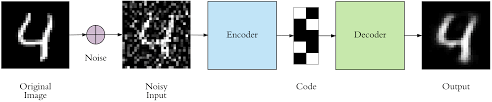

In [1]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

#랜덤하게 노이즈 데이터 생성
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

11493376/11490434 [==============================] - 0s 0us/step


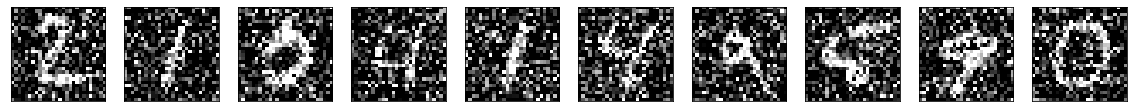

In [4]:
import matplotlib.pyplot as plt 
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()  #데이터에 노이즈 줌 

In [6]:
import keras
from keras import layers
#model
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [7]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128) #노이즈가 제거됨 d

Epoch 1/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1646
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1146
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1087
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1055
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1036
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1022
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1010
Epoch 8/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1002
Epoch 9/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0994
Epoch 10/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0987
Epoch 11/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0982
Epoch 12/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0976
Epoch 13/100


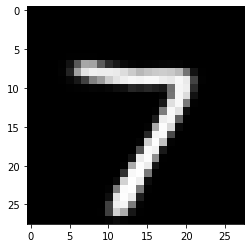

In [9]:
decoder_image=autoencoder(x_test[0][np.newaxis]).numpy()
plt.imshow(decoder_image.reshape(28,28),cmap='gray') # noise 제거됨